In [47]:
%load_ext autoreload
%autoreload 2
import pandas as pd
 
import P3_helpers as hlp

import os
import pickle
import matplotlib.pyplot as plt
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
communities_dict = hlp.load_communities_dict_for_topic()
src_sets_by_comu_by_year = hlp.get_src_sets_from_com_dict(communities_dict)
years_list = sorted(list(src_sets_by_comu_by_year.keys()))
jacquard_similarities = hlp.jacquard_similarity_for_all_years(src_sets_by_comu_by_year, years_list)
max_jacquard_similarities = hlp.max_jacquard_sim(jacquard_similarities)

In [97]:
nodesV2 = []
for year, df in communities_dict.items():
    for comu in df['Community'].unique():
        temp = df[df['Community'] == comu]
        size = len(temp)
        nodesV2.append((year, comu, size))

In [66]:
max_jacquard_similarities

{'2004-2005': {0: (2, 0.073),
  1: (2, 0.064),
  2: (5, 0.014),
  3: (2, 0.178),
  4: (1, 0.041)},
 '2005-2006': {0: (0, 0.189),
  1: (0, 0.055),
  2: (0, 0.099),
  3: (2, 0.002),
  4: (0, 0.014),
  5: (0, 0.011)},
 '2006-2007': {0: (2, 0.074), 1: (2, 0.199), 2: (2, 0.067)},
 '2007-2008': {0: (0, 0.17), 1: (0, 0.049), 2: (1, 0.06), 3: (1, 0.059)},
 '2008-2009': {0: (1, 0.068), 1: (4, 0.104), 2: (1, 0.162), 3: (4, 0.05)},
 '2009-2010': {2: (1, 0.156),
  1: (1, 0.083),
  4: (1, 0.098),
  3: (1, 0.07),
  0: (0, 0.004)},
 '2010-2011': {2: (2, 0.059), 1: (2, 0.085), 3: (2, 0.133), 0: (3, 0.056)},
 '2011-2012': {2: (2, 0.095),
  0: (2, 0.129),
  3: (2, 0.081),
  4: (1, 0.02),
  1: (0, 0.027)},
 '2012-2013': {0: (5, 0.116), 1: (5, 0.088), 2: (1, 0.079)}}

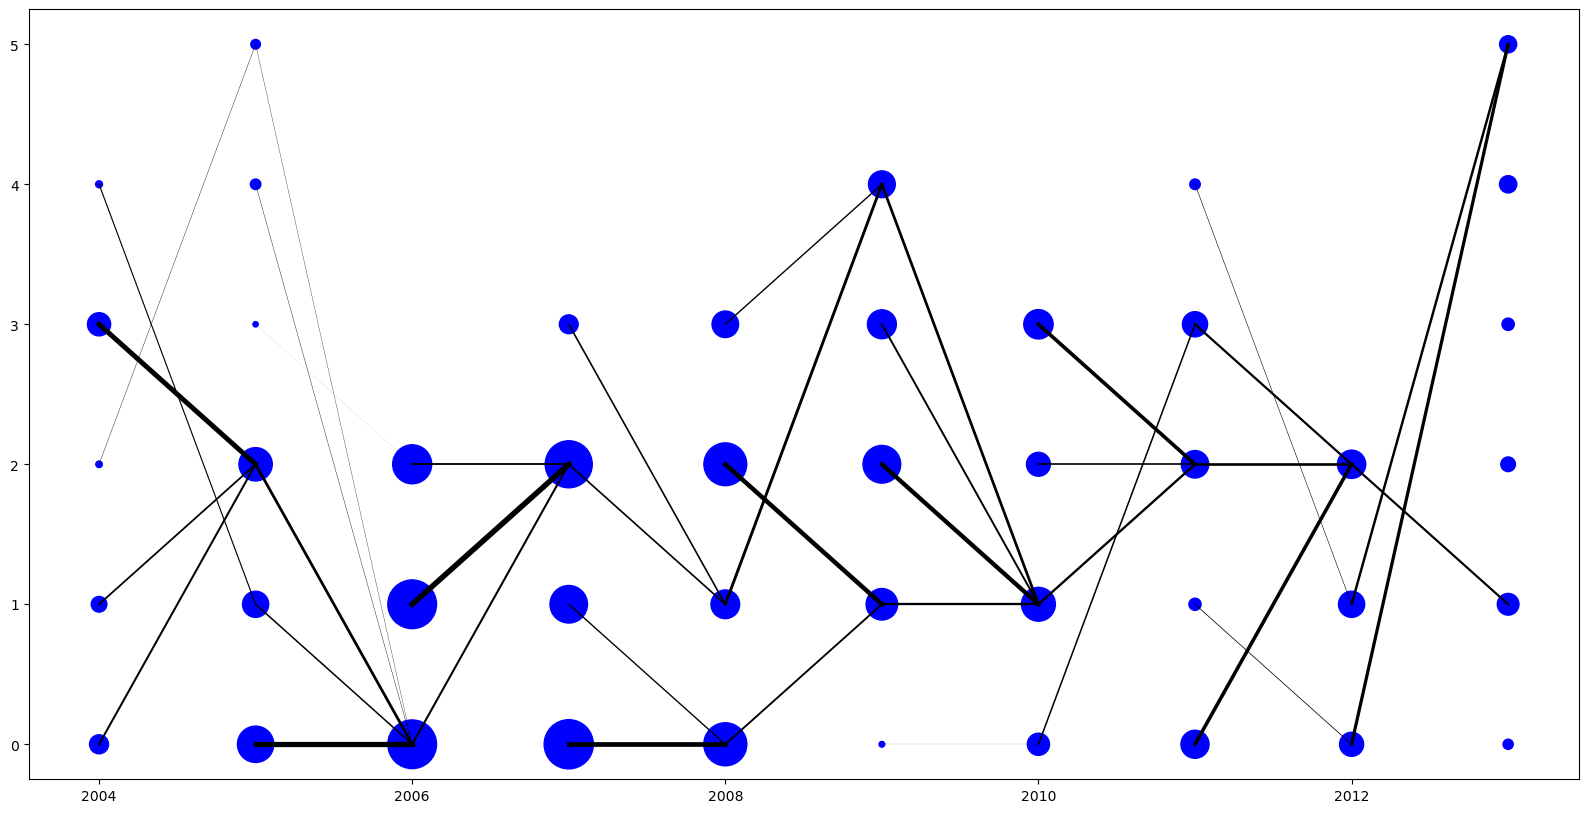

In [98]:
edges = set()
for years, map in max_jacquard_similarities.items():
    x1 = years.split('-')[0]
    x2 = years.split('-')[1]
    for commu1, commu2Weight in map.items():
        commu2 = commu2Weight[0]
        edges.add(((x1, commu1), (x2, commu2), commu2Weight[1]))

plt.figure(figsize=(20,10))
for edge in edges:
    plt.plot([int(edge[0][0]), int(edge[1][0])], [int(edge[0][1]), int(edge[1][1])], linewidth=edge[2]*20, color='black')
plt.scatter([int(node[0]) for node in nodesV2], [int(node[1]) for node in nodesV2], s=[int(node[2]) for node in nodesV2], color='blue', alpha=1)
plt.show()

In [100]:
jacquard_similarities

{'2004-2005': {0: {0: 0.008083140877598153,
   1: 0.0111731843575419,
   2: 0.07303370786516854,
   3: 0.0,
   4: 0.00823045267489712,
   5: 0.008547008547008548},
  1: {0: 0.0049504950495049506,
   1: 0.016877637130801686,
   2: 0.06354009077155824,
   3: 0.0070921985815602835,
   4: 0.0,
   5: 0.011560693641618497},
  2: {0: 0.00141643059490085,
   1: 0.0026595744680851063,
   2: 0.011844331641285956,
   3: 0.0,
   4: 0.0,
   5: 0.014492753623188406},
  3: {0: 0.014752370916754479,
   1: 0.022617124394184167,
   2: 0.17793103448275863,
   3: 0.0,
   4: 0.006006006006006006,
   5: 0.003076923076923077},
  4: {0: 0.0070921985815602835,
   1: 0.0410958904109589,
   2: 0.005016722408026756,
   3: 0.0,
   4: 0.0,
   5: 0.0}},
 '2005-2006': {0: {0: 0.18881987577639753,
   1: 0.021878335112059766,
   2: 0.0454222853087296},
  1: {0: 0.0552964690206529, 1: 0.010841836734693877, 2: 0.020535714285714286},
  2: {0: 0.09926918392204628, 1: 0.018612521150592216, 2: 0.03255109765329296},
  3: {0: 

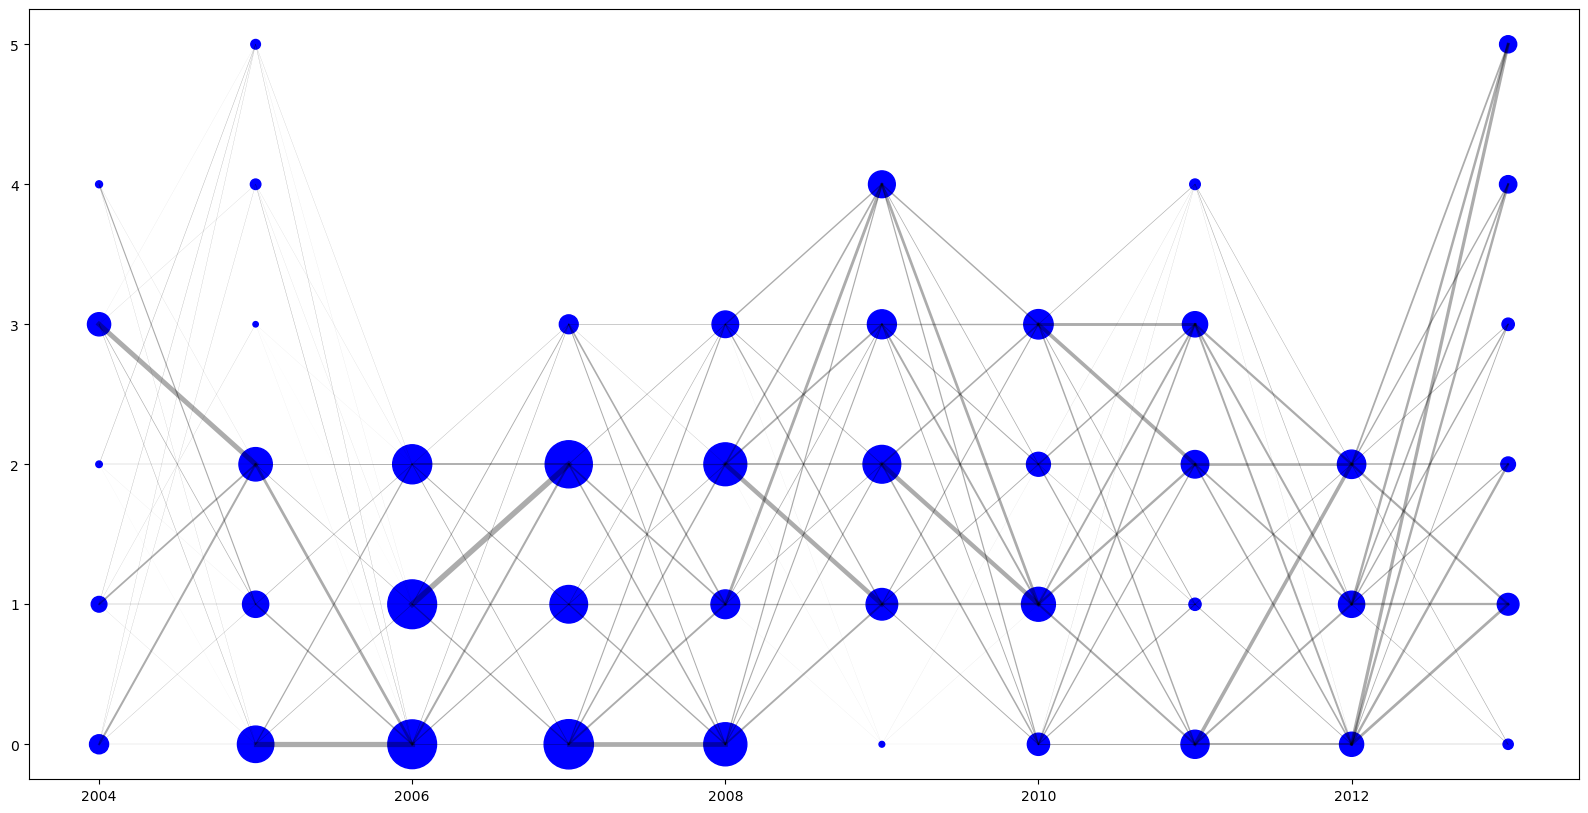

In [105]:
edges = set()
for years, map in jacquard_similarities.items():
    x1 = years.split('-')[0]
    x2 = years.split('-')[1]
    for commu1, commuDictWeight in map.items():
        for commu2, weight in commuDictWeight.items():
            edges.add(((x1, commu1), (x2, commu2), weight))

plt.figure(figsize=(20,10))
for edge in edges:
    plt.plot([int(edge[0][0]), int(edge[1][0])], [int(edge[0][1]), int(edge[1][1])], linewidth=edge[2]*20, color='black', alpha=weight*15)
plt.scatter([int(node[0]) for node in nodesV2], [int(node[1]) for node in nodesV2], s=[int(node[2]) for node in nodesV2], color='blue', alpha=1)
plt.show()